<a href="https://colab.research.google.com/github/cjfergie/AAPL-Stock-Econometric-Models-and-Analysis-Using-Alpha-Wave-Data-APIs/blob/main/Algo_Trading_Trend_Following_Strat_SMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget -nc https://lazyprogrammer.me/course_files/SPY.csv

--2024-03-25 00:54:12--  https://lazyprogrammer.me/course_files/SPY.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 172.67.213.166, 104.21.23.210, 2606:4700:3030::ac43:d5a6, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|172.67.213.166|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 251935 (246K) [text/csv]
Saving to: ‘SPY.csv’

SPY.csv             100%[===================>] 246.03K  --.-KB/s    in 0.03s   

2024-03-25 00:54:12 (7.57 MB/s) - ‘SPY.csv’ saved [251935/251935]



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv('SPY.csv', index_col='Date', parse_dates=True)

In [4]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,112.370003,113.389999,111.510002,113.330002,92.246048,118944600
2010-01-05,113.260002,113.680000,112.849998,113.629997,92.490204,111579900
2010-01-06,113.519997,113.989998,113.430000,113.709999,92.555328,116074400
2010-01-07,113.500000,114.330002,113.180000,114.190002,92.946060,131091100
2010-01-08,113.889999,114.620003,113.660004,114.570000,93.255348,126402800


In [5]:
df['LogReturn'] = np.log(df['Close']).diff()

In [6]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,LogReturn
Date,,,,,,,
2010-01-04,112.370003,113.389999,111.510002,113.330002,92.246048,118944600,NaN
2010-01-05,113.260002,113.680000,112.849998,113.629997,92.490204,111579900,0.002644
2010-01-06,113.519997,113.989998,113.430000,113.709999,92.555328,116074400,0.000704
2010-01-07,113.500000,114.330002,113.180000,114.190002,92.946060,131091100,0.004212
2010-01-08,113.889999,114.620003,113.660004,114.570000,93.255348,126402800,0.003322


In [7]:
df['SlowMA'] = df['Close'].rolling(30).mean()
df['FastMA'] = df['Close'].rolling(10).mean()
df['MidMA'] = df['Close'].rolling(100).mean()

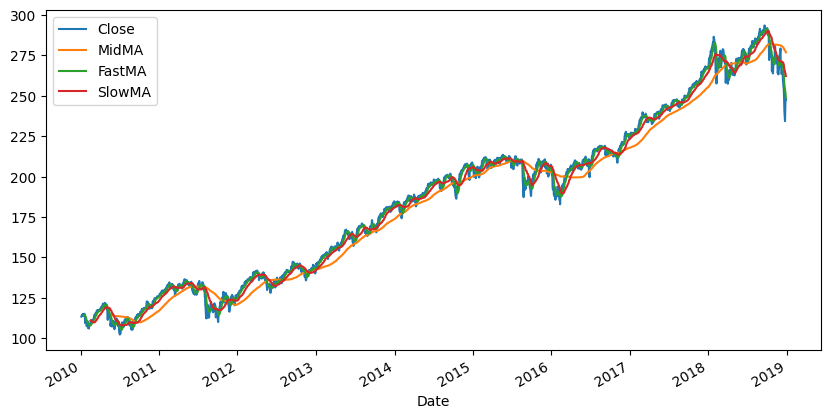

In [8]:
df[['Close', 'MidMA', 'FastMA', 'SlowMA']].plot(figsize=(10, 5));

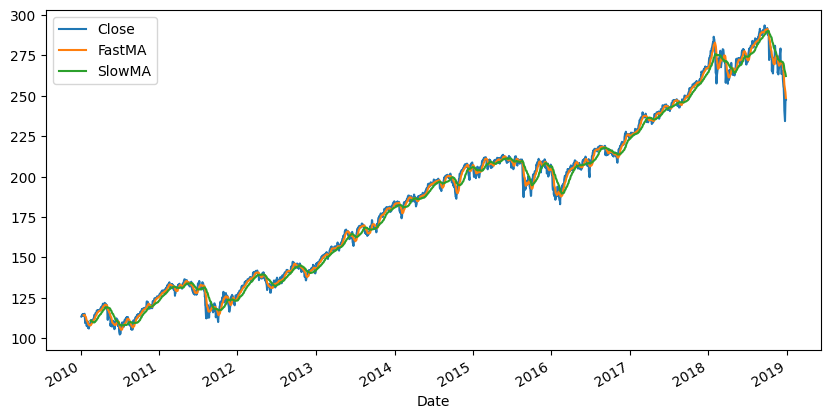

In [9]:
df[['Close', 'FastMA', 'SlowMA']].plot(figsize=(10, 5));

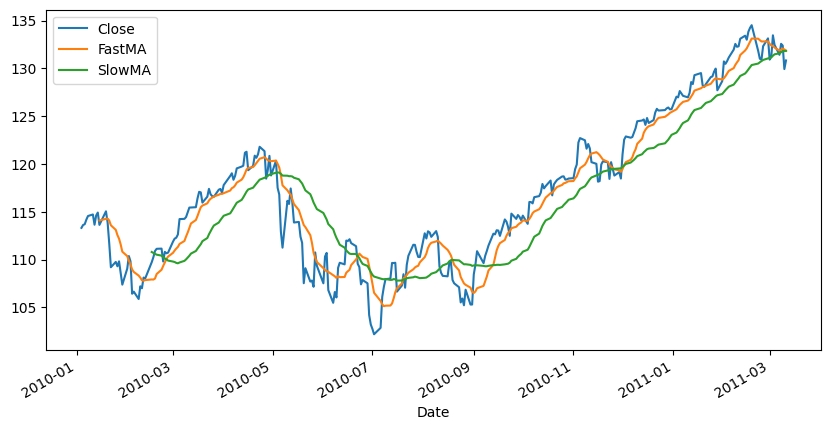

In [10]:
df[['Close', 'FastMA', 'SlowMA']].iloc[:300].plot(figsize=(10, 5));

In [11]:
df['Signal'] = np.where(df['FastMA'] >= df['SlowMA'], 1, 0)

In [12]:
df.iloc[80:].head(10)

,Open,High,Low,Close,Adj Close,Volume,LogReturn,SlowMA,FastMA,MidMA,Signal
Date,,,,,,,,,,,
2010-04-29,120.099998,121.110001,120.070000,120.860001,98.780228,193775000,0.012321,118.891334,120.360999,NaN,1
2010-04-30,120.879997,121.010002,118.779999,118.809998,97.104759,270000900,-0.017107,118.950333,120.305999,NaN,1
2010-05-03,119.379997,120.680000,119.199997,120.349998,98.363426,182747900,0.012879,119.096333,120.359999,NaN,1
2010-05-04,119.010002,119.029999,116.919998,117.519997,96.050430,360353400,-0.023796,119.127333,120.023999,NaN,1
2010-05-05,116.559998,117.800003,115.970001,116.820000,95.478325,328973200,-0.005974,119.107667,119.639999,NaN,1
2010-05-06,116.260002,117.000000,105.000000,112.940002,92.307137,647356600,-0.033778,118.977667,118.831999,NaN,0
2010-05-07,112.639999,113.769997,109.410004,111.260002,90.934059,637558800,-0.014987,118.798000,117.777000,NaN,0
2010-05-10,115.809998,116.650002,114.910004,116.160004,94.938896,396159600,0.043099,118.784000,117.258000,NaN,0
2010-05-11,115.070000,117.360001,114.910004,115.830002,94.669189,317849800,-0.002845,118.734334,116.993000,NaN,0


In [13]:
df['PrevSignal'] = df['Signal'].shift(1)
df['Buy'] = (df['PrevSignal'] == 0) & (df['Signal'] ==1) # Fast < Slow ---> Fast > Slow
df['Sell'] = (df['PrevSignal'] == 1) & (df['Signal'] == 0) # Fast > Slow ---> Fast < Slow

In [14]:
df.iloc[80:].head(15)

,Open,High,Low,Close,Adj Close,Volume,LogReturn,SlowMA,FastMA,MidMA,Signal,PrevSignal,Buy,Sell
Date,,,,,,,,,,,,,,
2010-04-29,120.099998,121.110001,120.070000,120.860001,98.780228,193775000,0.012321,118.891334,120.360999,NaN,1,1.0,False,False
2010-04-30,120.879997,121.010002,118.779999,118.809998,97.104759,270000900,-0.017107,118.950333,120.305999,NaN,1,1.0,False,False
2010-05-03,119.379997,120.680000,119.199997,120.349998,98.363426,182747900,0.012879,119.096333,120.359999,NaN,1,1.0,False,False
2010-05-04,119.010002,119.029999,116.919998,117.519997,96.050430,360353400,-0.023796,119.127333,120.023999,NaN,1,1.0,False,False
2010-05-05,116.559998,117.800003,115.970001,116.820000,95.478325,328973200,-0.005974,119.107667,119.639999,NaN,1,1.0,False,False
2010-05-06,116.260002,117.000000,105.000000,112.940002,92.307137,647356600,-0.033778,118.977667,118.831999,NaN,0,1.0,False,True
2010-05-07,112.639999,113.769997,109.410004,111.260002,90.934059,637558800,-0.014987,118.798000,117.777000,NaN,0,0.0,False,False
2010-05-10,115.809998,116.650002,114.910004,116.160004,94.938896,396159600,0.043099,118.784000,117.258000,NaN,0,0.0,False,False
2010-05-11,115.070000,117.360001,114.910004,115.830002,94.669189,317849800,-0.002845,118.734334,116.993000,NaN,0,0.0,False,False


In [16]:
is_invested = False
def assign_is_invested(row):
  global is_invested
  if is_invested and row['Sell']:
    is_invested = False
  if not is_invested and row['Buy']:
    is_invested = True

  #otherwise just remain
  return is_invested

df['IsInvested'] = df.apply(assign_is_invested, axis=1)

In [17]:
#Total algo Log return
df['AlgoLogReturn'] = df['IsInvested'] * df['LogReturn']

In [18]:
#Toptal Algo Log Return
df['AlgoLogReturn'].sum()

0.6111326500044969

In [19]:
#Total return buy and hold
df['LogReturn'].sum()

0.782116240308401

In [20]:
df['AlgoLogReturn'].std(), df['AlgoLogReturn'].mean()/df['AlgoLogReturn'].std()

(0.005906650129178796, 0.04574057704722619)

In [21]:
df['LogReturn'].std(), df['LogReturn'].mean()/df['LogReturn'].std()

(0.009446971193167572, 0.036600423640896725)

#Searching for Fast and Slow Hyperparameters

In [43]:
# start by writing a function to plug in parameters and obtain score
Ntest = 1000
def trend_following(df, fast, slow):
  global is_invested
  df['SlowSMA'] = df['Close'].rolling(slow).mean()
  df['FastSMA'] = df['Close'].rolling(fast).mean()
  df['Signal'] = np.where(df['FastSMA'] >= df['SlowSMA'], 1, 0)
  df['PrevSignal'] = df['Signal'].shift(1)
  df['Buy'] = (df['PrevSignal'] == 0) & (df['Signal'] == 1) # Fast < Slow --> Fast > Slow
  df['Sell'] = (df['PrevSignal'] == 1) & (df['Signal'] == 0) # Fast > Slow --> Fast < Slow

  # Split into train and test
  train = df.iloc[:-Ntest]
  test = df.iloc[-Ntest:]

  train_idx = df.index <= train.index[-1]
  test_idx = df.index > train.index[-1]

  is_invested = False
  df.loc[train_idx,'IsInvested'] = train.apply(assign_is_invested, axis=1)
  df.loc[train_idx,'AlgoLogReturn'] = train['IsInvested'] * train['LogReturn']

  is_invested = False
  df.loc[test_idx,'IsInvested'] = test.apply(assign_is_invested, axis=1)
  df.loc[test_idx,'AlgoLogReturn'] = test['IsInvested'] * test['LogReturn']

  return train['AlgoLogReturn'][:-1].sum(), test['AlgoLogReturn'][:-1].sum()

In [44]:
trend_following(df, 10, 30)

(0.17140554009857745, 0.19507450152104688)

In [45]:
# conducting a grid search

best_fast = None
best_slow = None
best_score = float('-inf')
for fast in range(3, 30):
  for slow in range(fast + 5, 50):
    score, _ = trend_following(df, fast, slow)
    if score > best_score:
      best_fast = fast
      best_slow = slow
      best_score = score
best_fast, best_slow, trend_following(df, best_fast, best_slow)

(3, 12, (0.19922756626700355, 0.18556009988092814))

In [46]:
train = df.iloc[:-Ntest].copy()
test = df.iloc[-Ntest:].copy()

In [47]:
#Total return buy and hold train
train['LogReturn'][:-1].sum()

0.5794972295199754

In [48]:
# Total buy and hold test
# note: last value is NaN, just doing this for the sake of uniformity
test['LogReturn'][:-1].sum()

0.18632040953635443

In [49]:
#SR algo vs SR buy and hold train
train['AlgoLogReturn'].mean()/train['AlgoLogReturn'].std(), test['LogReturn'].mean()/test['LogReturn'].std()

(0.018994509313151418, 0.021430832240036644)

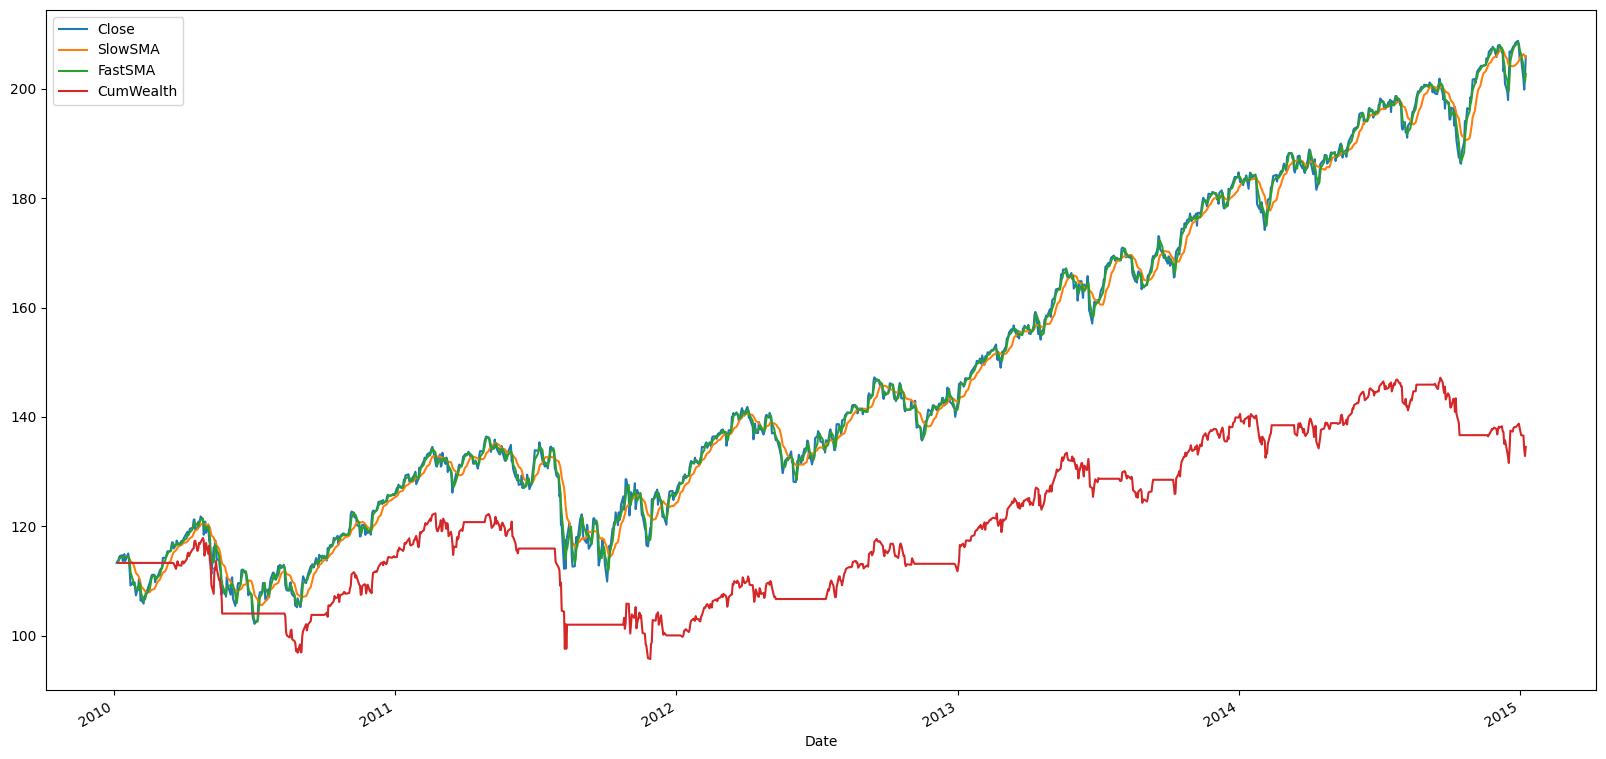

In [50]:
#wealth over time
train['CumLogReturn'] = train['AlgoLogReturn'].cumsum().shift(1)
train['CumWealth'] = train.iloc[0]['Close'] * np.exp(train['CumLogReturn'])
train[['Close', 'SlowSMA', 'FastSMA', 'CumWealth']].plot(figsize=(20, 10));